In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
kidney = pd.read_csv('chronic_kidney_disease_preprocessed.csv')

In [3]:
kidney = kidney.drop('id', axis=1)

In [4]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
392,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
393,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
394,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [5]:
# Separate the features and target variable
X = kidney.drop('class', axis=1)
y = kidney['class']

In [6]:
# Apply Correlation-based Feature Selection (CFS)
cfs_selector = SelectKBest(score_func=f_classif, k=17)
X_selected = cfs_selector.fit_transform(X, y)

In [7]:
# Get the selected feature names
selected_features = X.columns[cfs_selector.get_support()]

In [8]:
# Print the selected feature names
for feature in selected_features:
    print(feature)

bp
sg
al
rbc
pc
bgr
bu
sc
sod
hemo
pcv
rbcc
htn
dm
appet
pe
ane


In [9]:
# Subset the data with the selected features
kidney_selected = kidney[selected_features]

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# AdaBoost model with Decision Tree as base classifier
dt_model = DecisionTreeClassifier(random_state=42)
adaboost_dt = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50, random_state=42)
adaboost_dt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [27]:
# Bagging model with Decision Tree as base classifier
base_decision_tree = DecisionTreeClassifier(random_state=42)
bagging_dt = BaggingClassifier(base_estimator=base_decision_tree, n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)

# AdaBoost model with Bagging model as base classifier
adaboost_bagging = AdaBoostClassifier(base_estimator=bagging_dt, n_estimators=50, random_state=42)
adaboost_bagging.fit(X_train, y_train)

# Get the individual classifiers in the ensemble
individual_classifiers = list(adaboost_bagging.estimators_)

# Accumulate predictions for each classifier
y_pred_accumulated = sum(clf.predict(X_test) for clf in individual_classifiers)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [19]:
# AdaBoost model with Naive Bayes (NB) as base classifier
nb_model = GaussianNB()
adaboost_nb = AdaBoostClassifier(base_estimator=nb_model, n_estimators=50, random_state=42, algorithm='SAMME')
adaboost_nb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(),
                   random_state=42)

In [20]:
# AdaBoost model with Support Vector Machine (SVM) as base classifier
svm_model = SVC(kernel='linear', probability=True)
adaboost_svm = AdaBoostClassifier(base_estimator=svm_model, n_estimators=50, random_state=42, algorithm='SAMME')
adaboost_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(kernel='linear', probability=True),
                   random_state=42)

In [29]:
# Predictions
y_pred_dt = adaboost_dt.predict(X_test)
y_pred_adaboost_bagging = [1 if pred > len(individual_classifiers) / 2 else 0 for pred in y_pred_accumulated]
y_pred_nb = adaboost_nb.predict(X_test)
y_pred_svm = adaboost_svm.predict(X_test)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_adaboost_bagging = accuracy_score(y_test, y_pred_adaboost_bagging)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy (AdaBoost with Decision Tree): {accuracy_dt}")
print(f"Accuracy (AdaBoost with Bagging and Decision Tree): {accuracy_adaboost_bagging}")
print(f"Accuracy (AdaBoost with Naive Bayes): {accuracy_nb}")
print(f"Accuracy (AdaBoost with SVM): {accuracy_svm}")


Accuracy (AdaBoost with Decision Tree): 0.9625
Accuracy (AdaBoost with Bagging and Decision Tree): 0.9625
Accuracy (AdaBoost with Naive Bayes): 0.9875
Accuracy (AdaBoost with SVM): 0.9625


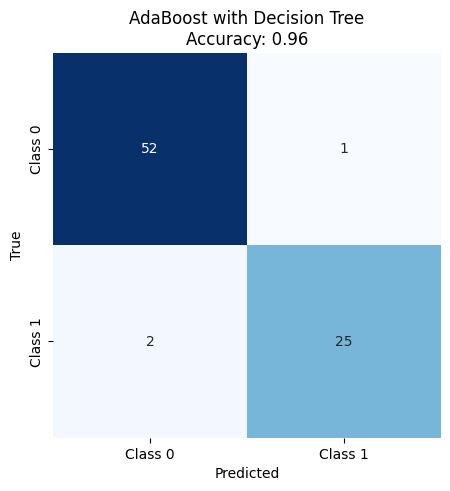

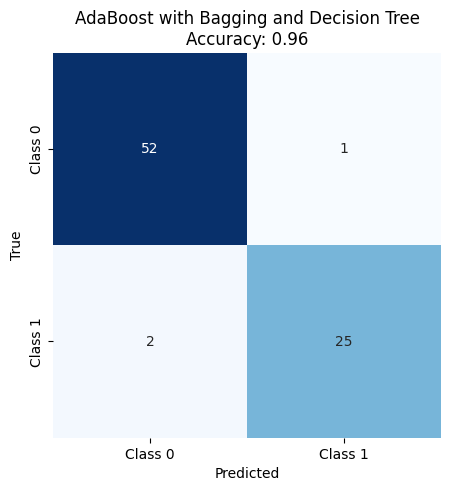

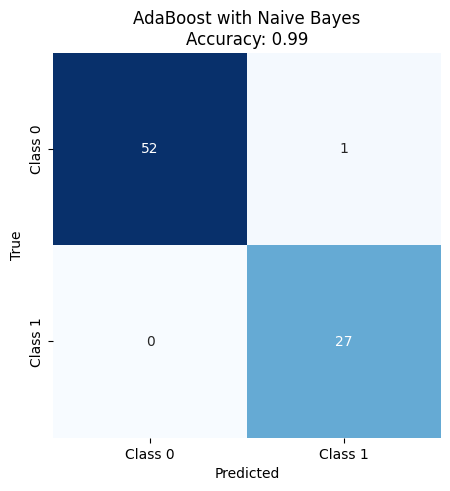

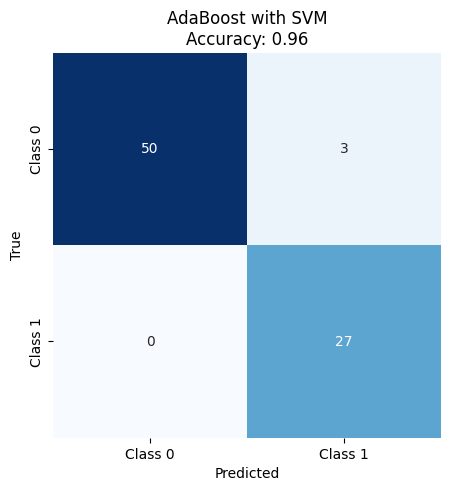

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Define a function for confusion matrix visualization
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title(f'{title}\nAccuracy: {accuracy:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Visualize AdaBoost with Decision Tree
plot_confusion(y_test, y_pred_dt, 'AdaBoost with Decision Tree')

# Visualize AdaBoost with Bagging and Decision Tree
plot_confusion(y_test, y_pred_adaboost_bagging, 'AdaBoost with Bagging and Decision Tree')

# Visualize AdaBoost with Naive Bayes
plot_confusion(y_test, y_pred_nb, 'AdaBoost with Naive Bayes')

# Visualize AdaBoost with SVM
plot_confusion(y_test, y_pred_svm, 'AdaBoost with SVM')

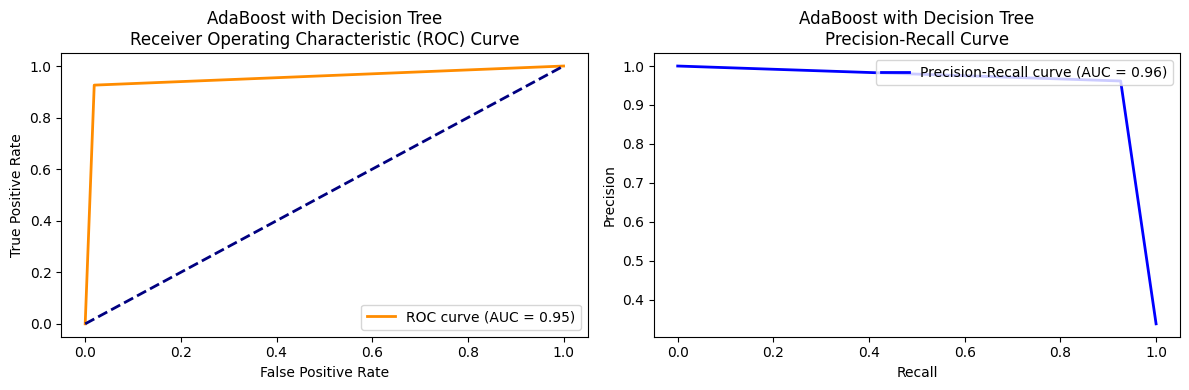

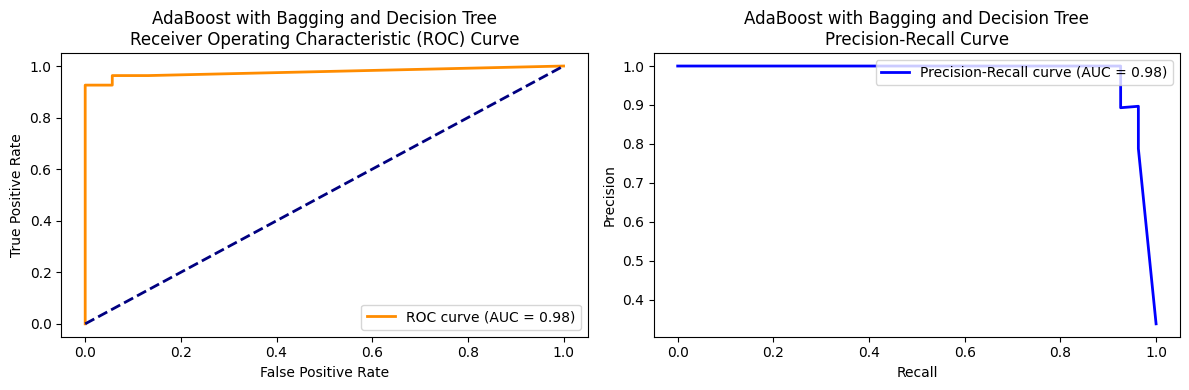

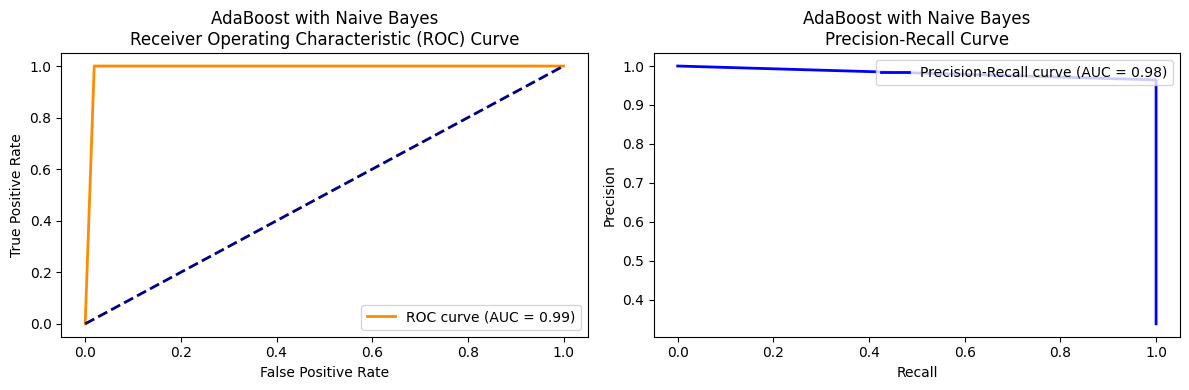

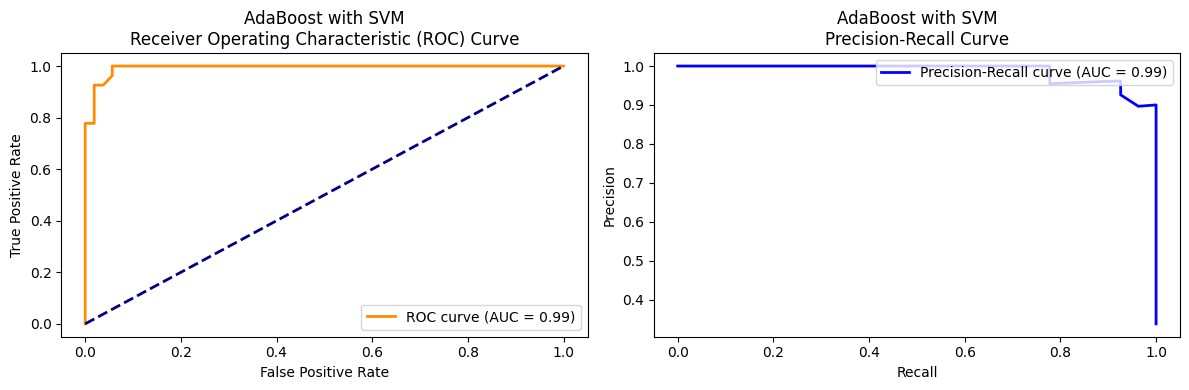

In [32]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Function to plot ROC and Precision-Recall curves
def plot_curves(y_true, y_probs, title):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    precision, recall, _ = precision_recall_curve(y_true, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title}\nReceiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(auc(recall, precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title}\nPrecision-Recall Curve')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Visualize AdaBoost with Decision Tree
plot_curves(y_test, adaboost_dt.predict_proba(X_test)[:, 1], 'AdaBoost with Decision Tree')

# Visualize AdaBoost with Bagging and Decision Tree
plot_curves(y_test, adaboost_bagging.predict_proba(X_test)[:, 1], 'AdaBoost with Bagging and Decision Tree')

# Visualize AdaBoost with Naive Bayes
plot_curves(y_test, adaboost_nb.predict_proba(X_test)[:, 1], 'AdaBoost with Naive Bayes')

# Visualize AdaBoost with SVM
plot_curves(y_test, adaboost_svm.decision_function(X_test), 'AdaBoost with SVM')


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate and print metrics
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

# Evaluate AdaBoost with Decision Tree
evaluate_model("AdaBoost with Decision Tree", y_test, adaboost_dt.predict(X_test))

# Evaluate AdaBoost with Bagging and Decision Tree
evaluate_model("AdaBoost with Bagging and Decision Tree", y_test, adaboost_bagging.predict(X_test))

# Evaluate AdaBoost with Naive Bayes
evaluate_model("AdaBoost with Naive Bayes", y_test, adaboost_nb.predict(X_test))

# Evaluate AdaBoost with SVM
evaluate_model("AdaBoost with SVM", y_test, adaboost_svm.predict(X_test))


Metrics for AdaBoost with Decision Tree:
Accuracy: 0.96
Precision: 0.96
Recall: 0.93
F1 Score: 0.94
Confusion Matrix:
[[52  1]
 [ 2 25]]


Metrics for AdaBoost with Bagging and Decision Tree:
Accuracy: 0.96
Precision: 0.96
Recall: 0.93
F1 Score: 0.94
Confusion Matrix:
[[52  1]
 [ 2 25]]


Metrics for AdaBoost with Naive Bayes:
Accuracy: 0.99
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[52  1]
 [ 0 27]]


Metrics for AdaBoost with SVM:
Accuracy: 0.96
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
Confusion Matrix:
[[50  3]
 [ 0 27]]


